In [136]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [138]:
img1 = cv.imread('image1.jpg')
img2 = cv.imread('image2.jpg')

gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# Task 1

## a）

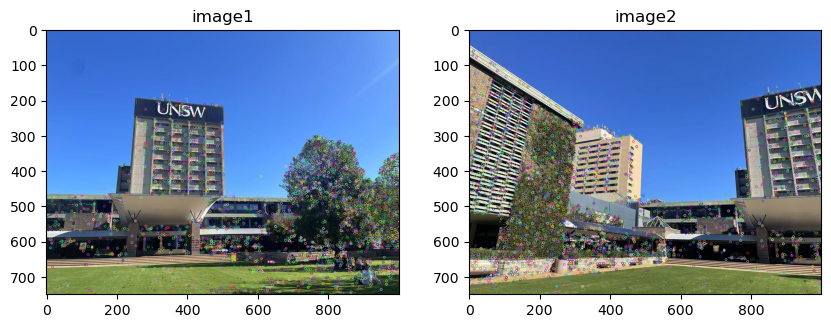

In [142]:
# Extract the SIFT features with default parameters

sift = cv.SIFT_create()
kp1 = sift.detect(gray1, None)
kp2 = sift.detect(gray2, None)

img_kp1 = cv.drawKeypoints(img1, kp1, None)
img_kp2 = cv.drawKeypoints(img2, kp2, None)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_kp1, cv.COLOR_BGR2RGB))
plt.title("image1")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_kp2, cv.COLOR_BGR2RGB))
plt.title("image2")

plt.show()

## b）

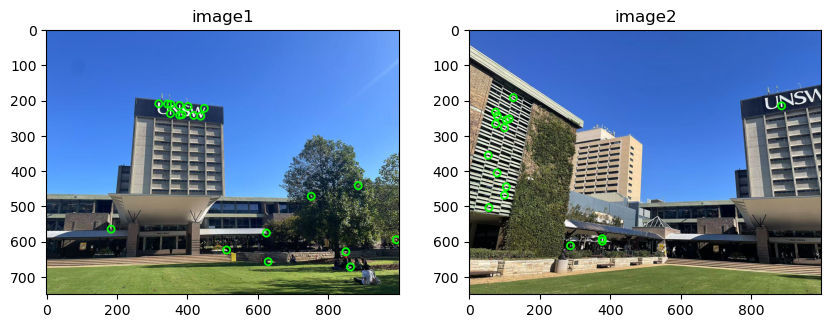

In [145]:
#Better visualization of the keypoints

sift = cv.SIFT_create(nfeatures=30, contrastThreshold=0.04)
kp1 = sift.detect(gray1, None)
kp2 = sift.detect(gray2, None)

img1 = cv.imread('image1.jpg')
img2 = cv.imread('image2.jpg')

def draw_custom_keypoints(img, keypoints):
    for kp in keypoints:
        x, y = kp.pt
        cv.circle(img, (int(x), int(y)), radius=10, color=(0, 255, 0), thickness=3)
    return img

img_kp1 = draw_custom_keypoints(img1, kp1)
img_kp2 = draw_custom_keypoints(img2, kp2)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_kp1, cv.COLOR_BGR2RGB))
plt.title("image1")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_kp2, cv.COLOR_BGR2RGB))
plt.title("image2")

plt.show()

1.Limited keypoints to 20 most prominent using nfeatures=30 in SIFT  
2.Increased keypoint visibility with fixed-size circles (radius=8, thickness=3)  
3.Applied green color for better contrast  
4.Used explicit circle drawing instead of default keypoint visualization  

# Task 2

## a）

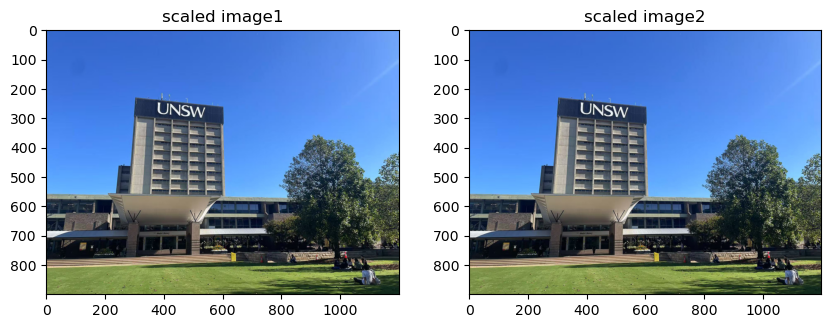

In [150]:
img1 = cv.imread('image1.jpg')
img2 = cv.imread('image2.jpg')

scaled_img1 = cv.resize(img1, None, fx=1.2, fy=1.2, interpolation=cv.INTER_LINEAR)
scaled_img2 = cv.resize(img2, None, fx=1.2, fy=1.2, interpolation=cv.INTER_LINEAR)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(scaled_img1, cv.COLOR_BGR2RGB))
plt.title("scaled image1")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(scaled_img1, cv.COLOR_BGR2RGB))
plt.title("scaled image2")

plt.show()

## b）

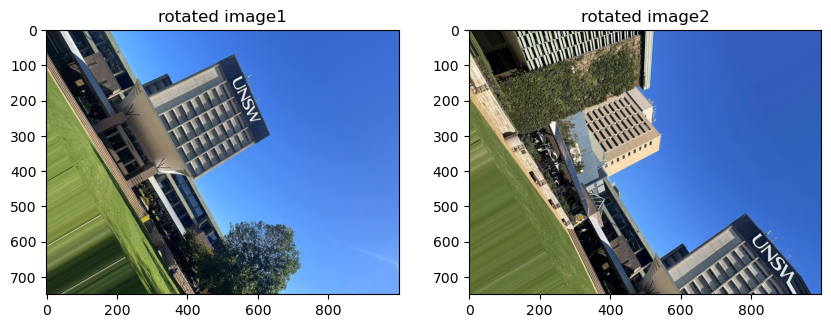

In [153]:
from skimage.util import random_noise

h1, w1 = img1.shape[:2]
M1 = cv.getRotationMatrix2D((w1//2, h1//2), -60, 1.0) 
rotated_img1 = cv.warpAffine(img1, M1, (w1, h1), borderMode=cv.BORDER_REPLICATE)

h2, w2 = img1.shape[:2]
M2 = cv.getRotationMatrix2D((w2//2, h2//2), -60, 1.0) 
rotated_img2 = cv.warpAffine(img2, M1, (w1, h1), borderMode=cv.BORDER_REPLICATE)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(rotated_img1, cv.COLOR_BGR2RGB))
plt.title("rotated image1")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(rotated_img2, cv.COLOR_BGR2RGB))
plt.title("rotated image2")

plt.show()

## c)

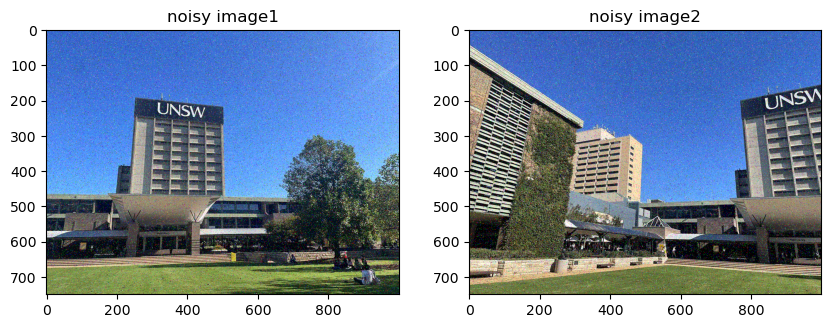

In [155]:
from skimage.util import random_noise

img1 = cv.imread('image1.jpg')
img2 = cv.imread('image2.jpg')

noisy_img1 = (random_noise(img1/255., mode='s&p', amount=0.05)*255).astype('uint8')
noisy_img2 = (random_noise(img2/255., mode='s&p', amount=0.05)*255).astype('uint8')

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(noisy_img1, cv.COLOR_BGR2RGB))
plt.title("noisy image1")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(noisy_img2, cv.COLOR_BGR2RGB))
plt.title("noisy image2")

plt.show()

## For each of these three versions of the pictures, extract the SIFT features and show the keypoints

In [158]:
# funtion for detect and draw keypoints
def detect_and_draw_30_keypoints(img1, img2):
    gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

    sift = cv.SIFT_create(nfeatures=30, contrastThreshold=0.04)

    kp1 = sift.detect(gray1, None)
    kp2 = sift.detect(gray2, None)

    def draw_custom_keypoints(img, keypoints):
        for kp in keypoints:
            x, y = kp.pt
            cv.circle(img, (int(x), int(y)), radius=10, color=(0, 255, 0), thickness=3)
        return img

    img_kp1 = draw_custom_keypoints(img1, kp1)
    img_kp2 = draw_custom_keypoints(img2, kp2)

    return img_kp1, img_kp2

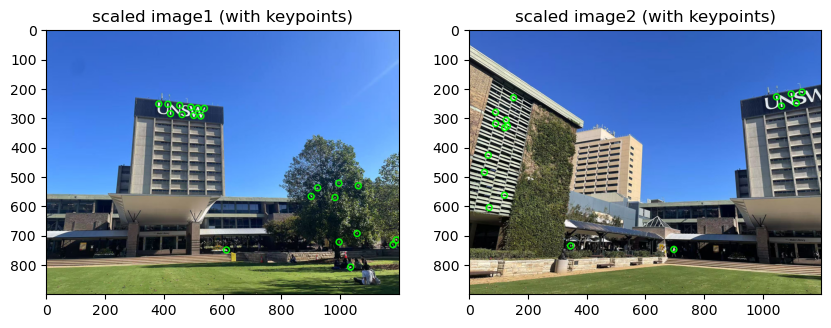

In [161]:
# keypoints of a)
scaled_img_kp1, scaled_img_kp2 = detect_and_draw_30_keypoints(scaled_img1, scaled_img2)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(scaled_img_kp1, cv.COLOR_BGR2RGB))
plt.title("scaled image1 (with keypoints)")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(scaled_img_kp2, cv.COLOR_BGR2RGB))
plt.title("scaled image2 (with keypoints)")

plt.show()

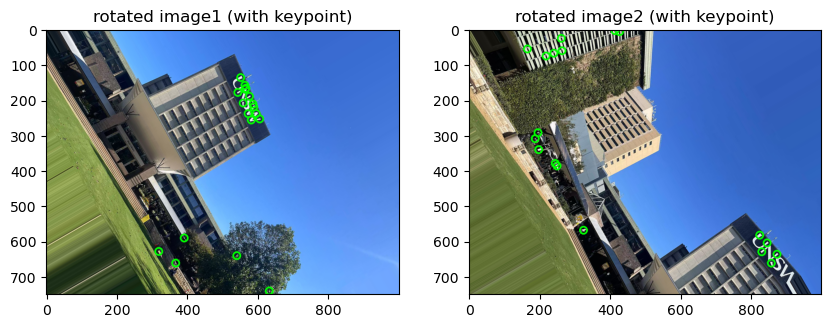

In [163]:
# keypoints of b)
rotated_img_kp1, rotated_img_kp2 = detect_and_draw_30_keypoints(rotated_img1, rotated_img2)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(rotated_img_kp1, cv.COLOR_BGR2RGB))
plt.title("rotated image1 (with keypoint)")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(rotated_img_kp2, cv.COLOR_BGR2RGB))
plt.title("rotated image2 (with keypoint)")

plt.show()

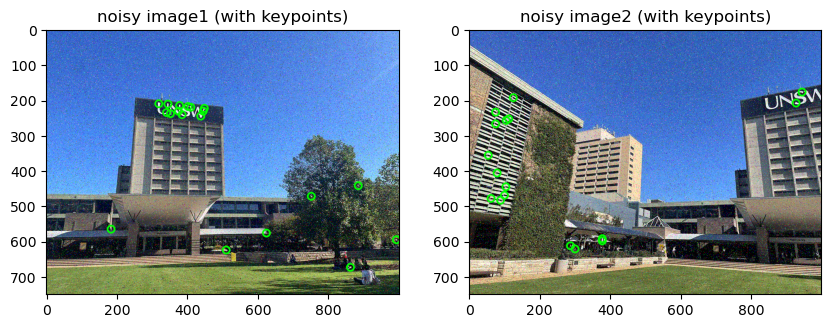

In [165]:
# keypoints of c)
noisy_img_kp1, noisy_img_kp2 = detect_and_draw_30_keypoints(noisy_img1, noisy_img2)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(noisy_img_kp1, cv.COLOR_BGR2RGB))
plt.title("noisy image1 (with keypoints)")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(noisy_img_kp2, cv.COLOR_BGR2RGB))
plt.title("noisy image2 (with keypoints)")

plt.show()

The keypoints of the processed pictures are roughly consistent with the original pictures.  
Robustness ranking: Rotation>Scaling>Noise  
  
Scaling: proves that SIFT is scale invariant  
Rotation: proves that SIFT is rotation invariant  
Noise: due to the presence of a large number of false noise points, some real keypoints are covered by noise  

# Task 3

## a)

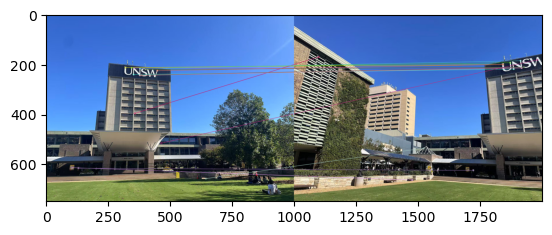

In [338]:
sift = cv.SIFT_create(nfeatures=300, contrastThreshold=0.04)

kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)

img3 = cv.drawMatches(img1, kp1, img2, kp2, good, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.show()

## b)

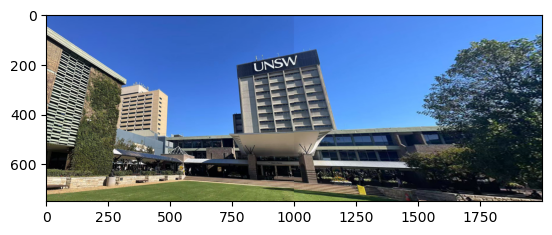

In [341]:
if len(good) > 10:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
 
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    
    M = M.astype(np.float32)
        
    h1, w1 = img1.shape[:2]
    h2, w2 = img1.shape[:2]
        
    img1_warped = cv.warpPerspective(img1, M, (w1 + w2, h1)) 
    img1_warped[0:h1, 0:w2] = img2
        
    plt.imshow(cv.cvtColor(img1_warped, cv.COLOR_BGR2RGB))
    plt.show()
    
else:
    print( "Not enough matches are found - {}/{}".format(len(good), 10) )
    matchesMask = None